# KiDS SOM
In the following, the KiDS-1000 SOM is recreated. 

In [60]:
# import functions
from astropy.table import Table

from collections import defaultdict

import numpy as np
from numpy import unravel_index

import sys
sys.path.append('/opt/anaconda3/lib/python3.8/site-packages') #minisom location
sys.path.append('/Users/diana/Research/DESI-SOM/') #som codes location

from som.utils import stack_vertically
from som.utils import generate_colors
from som.utils import normalize_data
from som.soms import generate_som
from som.soms import plot_som
from som.soms import plot_recreate_som

In [61]:
# create an empty array (som map) with dimensions matching KiDS-1000 SOM

# from Wright et al. 2020
a = 101
b = 101
c = 36 # colors

In [133]:
som = np.zeros((a,b));
#som = np.zeros((x*y));
som = som.astype(object);

In [134]:
# read in the code vectors
# data path 
path = '/Users/diana/Research/DESI-SOM/data/KiDS'

# import data
KiDS1000_vectors_table = Table.read(f'{path}/K1000_Spec_Train_Adapt_SOM_codebook.csv')

In [135]:
# visualize one of the code vectors
KiDS1000_vectors_table[0]     # for every cell, contains the every combination of ugriZYJHKs color

MAG_GAAP_u-MAG_GAAP_g,MAG_GAAP_u-MAG_GAAP_r,MAG_GAAP_g-MAG_GAAP_r,MAG_GAAP_u-MAG_GAAP_i,MAG_GAAP_g-MAG_GAAP_i,MAG_GAAP_r-MAG_GAAP_i,MAG_GAAP_u-MAG_GAAP_Z,MAG_GAAP_g-MAG_GAAP_Z,MAG_GAAP_r-MAG_GAAP_Z,MAG_GAAP_i-MAG_GAAP_Z,MAG_GAAP_u-MAG_GAAP_Y,MAG_GAAP_g-MAG_GAAP_Y,MAG_GAAP_r-MAG_GAAP_Y,MAG_GAAP_i-MAG_GAAP_Y,MAG_GAAP_Z-MAG_GAAP_Y,MAG_GAAP_u-MAG_GAAP_J,MAG_GAAP_g-MAG_GAAP_J,MAG_GAAP_r-MAG_GAAP_J,MAG_GAAP_i-MAG_GAAP_J,MAG_GAAP_Z-MAG_GAAP_J,MAG_GAAP_Y-MAG_GAAP_J,MAG_GAAP_u-MAG_GAAP_H,MAG_GAAP_g-MAG_GAAP_H,MAG_GAAP_r-MAG_GAAP_H,MAG_GAAP_i-MAG_GAAP_H,MAG_GAAP_Z-MAG_GAAP_H,MAG_GAAP_Y-MAG_GAAP_H,MAG_GAAP_J-MAG_GAAP_H,MAG_GAAP_u-MAG_GAAP_Ks,MAG_GAAP_g-MAG_GAAP_Ks,MAG_GAAP_r-MAG_GAAP_Ks,MAG_GAAP_i-MAG_GAAP_Ks,MAG_GAAP_Z-MAG_GAAP_Ks,MAG_GAAP_Y-MAG_GAAP_Ks,MAG_GAAP_J-MAG_GAAP_Ks,MAG_GAAP_H-MAG_GAAP_Ks,MAG_AUTO
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.04826952280975,0.393924343878265,-0.661809469471903,0.0868232143921108,-0.874657219896084,-0.828707967596517,-0.0999324652481516,-0.982991966415917,-0.980134804844496,-0.871827214408345,-0.279642085435292,-1.07191922931487,-1.09679723962894,-1.08935783064595,-0.915589671515611,-0.362259179475572,-1.08085822590041,-1.10507204815259,-1.11315618769579,-1.03929923086552,-0.607920623476787,-0.505155953226494,-1.1265082571906,-1.2168917869841,-1.26824003628594,-1.26574644536768,-1.12667054799896,-1.10093291013963,-0.655896627141717,-1.23569493891369,-1.34785615927764,-1.44265792481209,-1.48106563753684,-1.40067264311506,-1.51956233533845,-1.10878105624472,-1.47177073694784


In [145]:
# populate each cell in the map with the corresponding vector
ii = 0

for iy, ix in (np.ndindex(som.shape)): 
    if ii == int(a*b): # total number of cells 
        break
    som[iy, ix] = np.asarray(KiDS1000_vectors_table[ii])
    ii+=1

In [146]:
#som = np.lib.recfunctions.structured_to_unstructured(som.as_array())

In [147]:
# visualize one of the cells of the populated som map
som[0][0]     # for every cell, now contains every combination of ugriZYJHKs color
              # this is a tuple though, need to convert to array! 

array((1.04826952, 0.39392434, -0.66180947, 0.08682321, -0.87465722, -0.82870797, -0.09993247, -0.98299197, -0.9801348, -0.87182721, -0.27964209, -1.07191923, -1.09679724, -1.08935783, -0.91558967, -0.36225918, -1.08085823, -1.10507205, -1.11315619, -1.03929923, -0.60792062, -0.50515595, -1.12650826, -1.21689179, -1.26824004, -1.26574645, -1.12667055, -1.10093291, -0.65589663, -1.23569494, -1.34785616, -1.44265792, -1.48106564, -1.40067264, -1.51956234, -1.10878106, -1.47177074),
      dtype=[('MAG_GAAP_u-MAG_GAAP_g', '<f8'), ('MAG_GAAP_u-MAG_GAAP_r', '<f8'), ('MAG_GAAP_g-MAG_GAAP_r', '<f8'), ('MAG_GAAP_u-MAG_GAAP_i', '<f8'), ('MAG_GAAP_g-MAG_GAAP_i', '<f8'), ('MAG_GAAP_r-MAG_GAAP_i', '<f8'), ('MAG_GAAP_u-MAG_GAAP_Z', '<f8'), ('MAG_GAAP_g-MAG_GAAP_Z', '<f8'), ('MAG_GAAP_r-MAG_GAAP_Z', '<f8'), ('MAG_GAAP_i-MAG_GAAP_Z', '<f8'), ('MAG_GAAP_u-MAG_GAAP_Y', '<f8'), ('MAG_GAAP_g-MAG_GAAP_Y', '<f8'), ('MAG_GAAP_r-MAG_GAAP_Y', '<f8'), ('MAG_GAAP_i-MAG_GAAP_Y', '<f8'), ('MAG_GAAP_Z-MAG_GAAP_Y', 

In [99]:
# open up KiDS-1000 catalog

# data path 
path = '/Users/diana/Research/DESI-SOM/data/KiDS'

# import data
kids_wide_table = Table.read(f'{path}/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat_basicinfo.fits', format = 'fits')

In [100]:
# take a subsample of the KiDS-1000 catalog
n_sample = 100 # number in sample
kids_wide_sample_table = kids_wide_table[0:n_sample]

# how large is our subsample?
len(kids_wide_sample_table)

100

In [101]:
# visualize one of the galaxy data
kids_wide_sample_table[0]

SeqNr,SLID,SID,ID,MAG_AUTO,MAGERR_AUTO,RAJ2000,DECJ2000,ALPHA_J2000,DELTA_J2000,MAG_GAAP_u,MAGERR_GAAP_u,FLUX_GAAP_u,FLUXERR_GAAP_u,FLAG_GAAP_u,MAG_GAAP_g,MAGERR_GAAP_g,FLUX_GAAP_g,FLUXERR_GAAP_g,FLAG_GAAP_g,MAG_GAAP_r,MAGERR_GAAP_r,FLUX_GAAP_r,FLUXERR_GAAP_r,FLAG_GAAP_r,MAG_GAAP_i,MAGERR_GAAP_i,FLUX_GAAP_i,FLUXERR_GAAP_i,FLAG_GAAP_i,MAG_GAAP_Z,MAGERR_GAAP_Z,FLUX_GAAP_Z,FLUXERR_GAAP_Z,FLAG_GAAP_Z,MAG_GAAP_Y,MAGERR_GAAP_Y,FLUX_GAAP_Y,FLUXERR_GAAP_Y,FLAG_GAAP_Y,MAG_GAAP_J,MAGERR_GAAP_J,FLUX_GAAP_J,FLUXERR_GAAP_J,FLAG_GAAP_J,MAG_GAAP_H,MAGERR_GAAP_H,FLUX_GAAP_H,FLUXERR_GAAP_H,FLAG_GAAP_H,MAG_GAAP_Ks,MAGERR_GAAP_Ks,FLUX_GAAP_Ks,FLUXERR_GAAP_Ks,FLAG_GAAP_Ks
,,,,mag,mag,deg,deg,deg,deg,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,
int32,int32,int32,bytes25,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16
1,55071011,7667,KIDS_J083427.36-015753.4,24.96544,0.2316225,128.613994,-1.964857,128.613994,-1.964857,99.0,6.722888,1.0562e-11,6.54e-11,0,24.549961,0.21909648,1.3925e-10,2.81e-11,0,24.421225,0.20971318,1.6153e-10,3.12e-11,0,23.927616,0.30297685,2.616e-10,7.3e-11,0,23.71167,0.553141,316.02,161.0,0,23.100142,0.741575,557.82,381.0,0,24.112928,2.07892,221.8589,424.8053,0,22.594416,1.23558,905.09,1030.0,0,22.575802,1.10735,924.59,943.0,0


In [102]:
# obtain colors for each of these, based on KiDS-1000 SOM 
# (there is probably a better way to code this...) (re-work) (this is the brute force way... RIP)
# add columns with colors
kids_wide_sample_table['MAG_GAAP_u-MAG_GAAP_g'] = kids_wide_sample_table['MAG_GAAP_u'] - kids_wide_sample_table['MAG_GAAP_g']
kids_wide_sample_table['MAG_GAAP_u-MAG_GAAP_r'] = kids_wide_sample_table['MAG_GAAP_u'] - kids_wide_sample_table['MAG_GAAP_r']
kids_wide_sample_table['MAG_GAAP_g-MAG_GAAP_r'] = kids_wide_sample_table['MAG_GAAP_g'] - kids_wide_sample_table['MAG_GAAP_r']
kids_wide_sample_table['MAG_GAAP_u-MAG_GAAP_i'] = kids_wide_sample_table['MAG_GAAP_u'] - kids_wide_sample_table['MAG_GAAP_i']
kids_wide_sample_table['MAG_GAAP_g-MAG_GAAP_i'] = kids_wide_sample_table['MAG_GAAP_g'] - kids_wide_sample_table['MAG_GAAP_i']
kids_wide_sample_table['MAG_GAAP_r-MAG_GAAP_i'] = kids_wide_sample_table['MAG_GAAP_r'] - kids_wide_sample_table['MAG_GAAP_i']
kids_wide_sample_table['MAG_GAAP_u-MAG_GAAP_Z'] = kids_wide_sample_table['MAG_GAAP_u'] - kids_wide_sample_table['MAG_GAAP_Z']
kids_wide_sample_table['MAG_GAAP_g-MAG_GAAP_Z'] = kids_wide_sample_table['MAG_GAAP_g'] - kids_wide_sample_table['MAG_GAAP_Z']
kids_wide_sample_table['MAG_GAAP_r-MAG_GAAP_Z'] = kids_wide_sample_table['MAG_GAAP_r'] - kids_wide_sample_table['MAG_GAAP_Z']
kids_wide_sample_table['MAG_GAAP_i-MAG_GAAP_Z'] = kids_wide_sample_table['MAG_GAAP_i'] - kids_wide_sample_table['MAG_GAAP_Z']
kids_wide_sample_table['MAG_GAAP_u-MAG_GAAP_Y'] = kids_wide_sample_table['MAG_GAAP_u'] - kids_wide_sample_table['MAG_GAAP_Y']
kids_wide_sample_table['MAG_GAAP_g-MAG_GAAP_Y'] = kids_wide_sample_table['MAG_GAAP_g'] - kids_wide_sample_table['MAG_GAAP_Y']
kids_wide_sample_table['MAG_GAAP_r-MAG_GAAP_Y'] = kids_wide_sample_table['MAG_GAAP_r'] - kids_wide_sample_table['MAG_GAAP_Y']
kids_wide_sample_table['MAG_GAAP_i-MAG_GAAP_Y'] = kids_wide_sample_table['MAG_GAAP_i'] - kids_wide_sample_table['MAG_GAAP_Y']
kids_wide_sample_table['MAG_GAAP_Z-MAG_GAAP_Y'] = kids_wide_sample_table['MAG_GAAP_Z'] - kids_wide_sample_table['MAG_GAAP_Y']
kids_wide_sample_table['MAG_GAAP_u-MAG_GAAP_J'] = kids_wide_sample_table['MAG_GAAP_u'] - kids_wide_sample_table['MAG_GAAP_J']
kids_wide_sample_table['MAG_GAAP_g-MAG_GAAP_J'] = kids_wide_sample_table['MAG_GAAP_g'] - kids_wide_sample_table['MAG_GAAP_J']
kids_wide_sample_table['MAG_GAAP_r-MAG_GAAP_J'] = kids_wide_sample_table['MAG_GAAP_r'] - kids_wide_sample_table['MAG_GAAP_J']
kids_wide_sample_table['MAG_GAAP_i-MAG_GAAP_J'] = kids_wide_sample_table['MAG_GAAP_i'] - kids_wide_sample_table['MAG_GAAP_J']
kids_wide_sample_table['MAG_GAAP_Z-MAG_GAAP_J'] = kids_wide_sample_table['MAG_GAAP_Z'] - kids_wide_sample_table['MAG_GAAP_J']
kids_wide_sample_table['MAG_GAAP_Y-MAG_GAAP_J'] = kids_wide_sample_table['MAG_GAAP_Y'] - kids_wide_sample_table['MAG_GAAP_J']
kids_wide_sample_table['MAG_GAAP_u-MAG_GAAP_H'] = kids_wide_sample_table['MAG_GAAP_u'] - kids_wide_sample_table['MAG_GAAP_H']
kids_wide_sample_table['MAG_GAAP_g-MAG_GAAP_H'] = kids_wide_sample_table['MAG_GAAP_g'] - kids_wide_sample_table['MAG_GAAP_H']
kids_wide_sample_table['MAG_GAAP_r-MAG_GAAP_H'] = kids_wide_sample_table['MAG_GAAP_r'] - kids_wide_sample_table['MAG_GAAP_H']
kids_wide_sample_table['MAG_GAAP_i-MAG_GAAP_H'] = kids_wide_sample_table['MAG_GAAP_i'] - kids_wide_sample_table['MAG_GAAP_H']
kids_wide_sample_table['MAG_GAAP_Z-MAG_GAAP_H'] = kids_wide_sample_table['MAG_GAAP_Z'] - kids_wide_sample_table['MAG_GAAP_H']
kids_wide_sample_table['MAG_GAAP_Y-MAG_GAAP_H'] = kids_wide_sample_table['MAG_GAAP_Y'] - kids_wide_sample_table['MAG_GAAP_H']
kids_wide_sample_table['MAG_GAAP_J-MAG_GAAP_H'] = kids_wide_sample_table['MAG_GAAP_J'] - kids_wide_sample_table['MAG_GAAP_H']
kids_wide_sample_table['MAG_GAAP_u-MAG_GAAP_Ks'] = kids_wide_sample_table['MAG_GAAP_u'] - kids_wide_sample_table['MAG_GAAP_Ks']
kids_wide_sample_table['MAG_GAAP_g-MAG_GAAP_Ks'] = kids_wide_sample_table['MAG_GAAP_g'] - kids_wide_sample_table['MAG_GAAP_Ks']
kids_wide_sample_table['MAG_GAAP_r-MAG_GAAP_Ks'] = kids_wide_sample_table['MAG_GAAP_r'] - kids_wide_sample_table['MAG_GAAP_Ks']
kids_wide_sample_table['MAG_GAAP_i-MAG_GAAP_Ks'] = kids_wide_sample_table['MAG_GAAP_i'] - kids_wide_sample_table['MAG_GAAP_Ks']
kids_wide_sample_table['MAG_GAAP_Z-MAG_GAAP_Ks'] = kids_wide_sample_table['MAG_GAAP_Z'] - kids_wide_sample_table['MAG_GAAP_Ks']
kids_wide_sample_table['MAG_GAAP_Y-MAG_GAAP_Ks'] = kids_wide_sample_table['MAG_GAAP_Y'] - kids_wide_sample_table['MAG_GAAP_Ks']
kids_wide_sample_table['MAG_GAAP_J-MAG_GAAP_Ks'] = kids_wide_sample_table['MAG_GAAP_J'] - kids_wide_sample_table['MAG_GAAP_Ks']
kids_wide_sample_table['MAG_GAAP_H-MAG_GAAP_Ks'] = kids_wide_sample_table['MAG_GAAP_H'] - kids_wide_sample_table['MAG_GAAP_Ks']

In [103]:
# visualize one of the galaxy data, should now contain colors as well! 
kids_wide_sample_table[0]

SeqNr,SLID,SID,ID,MAG_AUTO,MAGERR_AUTO,RAJ2000,DECJ2000,ALPHA_J2000,DELTA_J2000,MAG_GAAP_u,MAGERR_GAAP_u,FLUX_GAAP_u,FLUXERR_GAAP_u,FLAG_GAAP_u,MAG_GAAP_g,MAGERR_GAAP_g,FLUX_GAAP_g,FLUXERR_GAAP_g,FLAG_GAAP_g,MAG_GAAP_r,MAGERR_GAAP_r,FLUX_GAAP_r,FLUXERR_GAAP_r,FLAG_GAAP_r,MAG_GAAP_i,MAGERR_GAAP_i,FLUX_GAAP_i,FLUXERR_GAAP_i,FLAG_GAAP_i,MAG_GAAP_Z,MAGERR_GAAP_Z,FLUX_GAAP_Z,FLUXERR_GAAP_Z,FLAG_GAAP_Z,MAG_GAAP_Y,MAGERR_GAAP_Y,FLUX_GAAP_Y,FLUXERR_GAAP_Y,FLAG_GAAP_Y,MAG_GAAP_J,MAGERR_GAAP_J,FLUX_GAAP_J,FLUXERR_GAAP_J,FLAG_GAAP_J,MAG_GAAP_H,MAGERR_GAAP_H,FLUX_GAAP_H,FLUXERR_GAAP_H,FLAG_GAAP_H,MAG_GAAP_Ks,MAGERR_GAAP_Ks,FLUX_GAAP_Ks,FLUXERR_GAAP_Ks,FLAG_GAAP_Ks,MAG_GAAP_u-MAG_GAAP_g,MAG_GAAP_u-MAG_GAAP_r,MAG_GAAP_g-MAG_GAAP_r,MAG_GAAP_u-MAG_GAAP_i,MAG_GAAP_g-MAG_GAAP_i,MAG_GAAP_r-MAG_GAAP_i,MAG_GAAP_u-MAG_GAAP_Z,MAG_GAAP_g-MAG_GAAP_Z,MAG_GAAP_r-MAG_GAAP_Z,MAG_GAAP_i-MAG_GAAP_Z,MAG_GAAP_u-MAG_GAAP_Y,MAG_GAAP_g-MAG_GAAP_Y,MAG_GAAP_r-MAG_GAAP_Y,MAG_GAAP_i-MAG_GAAP_Y,MAG_GAAP_Z-MAG_GAAP_Y,MAG_GAAP_u-MAG_GAAP_J,MAG_GAAP_g-MAG_GAAP_J,MAG_GAAP_r-MAG_GAAP_J,MAG_GAAP_i-MAG_GAAP_J,MAG_GAAP_Z-MAG_GAAP_J,MAG_GAAP_Y-MAG_GAAP_J,MAG_GAAP_u-MAG_GAAP_H,MAG_GAAP_g-MAG_GAAP_H,MAG_GAAP_r-MAG_GAAP_H,MAG_GAAP_i-MAG_GAAP_H,MAG_GAAP_Z-MAG_GAAP_H,MAG_GAAP_Y-MAG_GAAP_H,MAG_GAAP_J-MAG_GAAP_H,MAG_GAAP_u-MAG_GAAP_Ks,MAG_GAAP_g-MAG_GAAP_Ks,MAG_GAAP_r-MAG_GAAP_Ks,MAG_GAAP_i-MAG_GAAP_Ks,MAG_GAAP_Z-MAG_GAAP_Ks,MAG_GAAP_Y-MAG_GAAP_Ks,MAG_GAAP_J-MAG_GAAP_Ks,MAG_GAAP_H-MAG_GAAP_Ks
,,,,mag,mag,deg,deg,deg,deg,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
int32,int32,int32,bytes25,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1,55071011,7667,KIDS_J083427.36-015753.4,24.96544,0.2316225,128.613994,-1.964857,128.613994,-1.964857,99.0,6.722888,1.0562e-11,6.54e-11,0,24.549961,0.21909648,1.3925e-10,2.81e-11,0,24.421225,0.20971318,1.6153e-10,3.12e-11,0,23.927616,0.30297685,2.616e-10,7.3e-11,0,23.71167,0.553141,316.02,161.0,0,23.100142,0.741575,557.82,381.0,0,24.112928,2.07892,221.8589,424.8053,0,22.594416,1.23558,905.09,1030.0,0,22.575802,1.10735,924.59,943.0,0,74.45004,74.57877,0.1287365,75.07239,0.622345,0.49360847,75.28833,0.83829117,0.7095547,0.2159462,75.89986,1.4498196,1.3210831,0.8274746,0.6115284,74.88707,0.4370327,0.3082962,-0.18531227,-0.40125847,-1.0127869,76.40559,1.9555454,1.8268089,1.3332005,1.1172543,0.50572586,1.5185127,76.424194,1.9741592,1.8454227,1.3518143,1.1358681,0.5243397,1.5371265,0.018613815


## Whitening and Unwhitening
Whitening parameters (Median, nMAD) for every color. These correspond to the **median absolute deviation (MAD)** of the data. The MAD is a measurement of the variability of a sample that only contains one variable. In the context of this work, the univariable is the indicated color. 

In general, the MAD for a univariate data set is: 

$MAD = \text{median}(| X_i - \text{median}(X)|)$

And the Normalized Median Absolute Deviation (nMAD) is: 

$nMAD = 1.4826 \times \text{median}(|X_i -\text{median}(X)|)$

In [104]:
# open up whitening parameters... 
# these whitening parameters are for every color!
kids_wide_white_table = Table.read(f'{path}/K1000_Spec_Train_Adapt_SOM_whitenparam.csv', format = 'csv')

In [105]:
# visualize one of the whitening parameters... 
kids_wide_white_table[0]

Factor,Median,nMAD
str22,float64,float64
MAG_GAAP_u-MAG_GAAP_g,0.480890000000002,0.543758376000004


## Whiten Data
In order to whiten the galaxy colors, we follow the following technique.

Whitened Data $=~\frac{\text{median} - \text{data}}{MAD}$

Where traditionally: 

$MAD = nMAD~/~1.4826 $ 

In [106]:
colors = ['MAG_GAAP_u-MAG_GAAP_g', 'MAG_GAAP_u-MAG_GAAP_r', 'MAG_GAAP_g-MAG_GAAP_r', 
          'MAG_GAAP_u-MAG_GAAP_i', 'MAG_GAAP_g-MAG_GAAP_i', 'MAG_GAAP_r-MAG_GAAP_i',
          'MAG_GAAP_u-MAG_GAAP_Z', 'MAG_GAAP_g-MAG_GAAP_Z', 'MAG_GAAP_r-MAG_GAAP_Z', 
          'MAG_GAAP_i-MAG_GAAP_Z', 'MAG_GAAP_u-MAG_GAAP_Y', 'MAG_GAAP_g-MAG_GAAP_Y',
          'MAG_GAAP_r-MAG_GAAP_Y', 'MAG_GAAP_i-MAG_GAAP_Y', 'MAG_GAAP_Z-MAG_GAAP_Y', 
          'MAG_GAAP_u-MAG_GAAP_J', 'MAG_GAAP_g-MAG_GAAP_J', 'MAG_GAAP_r-MAG_GAAP_J', 
          'MAG_GAAP_i-MAG_GAAP_J', 'MAG_GAAP_Z-MAG_GAAP_J', 'MAG_GAAP_Y-MAG_GAAP_J', 
          'MAG_GAAP_u-MAG_GAAP_H', 'MAG_GAAP_g-MAG_GAAP_H', 'MAG_GAAP_r-MAG_GAAP_H', 
          'MAG_GAAP_i-MAG_GAAP_H', 'MAG_GAAP_Z-MAG_GAAP_H', 'MAG_GAAP_Y-MAG_GAAP_H', 
          'MAG_GAAP_J-MAG_GAAP_H', 'MAG_GAAP_u-MAG_GAAP_Ks', 'MAG_GAAP_g-MAG_GAAP_Ks', 
          'MAG_GAAP_r-MAG_GAAP_Ks', 'MAG_GAAP_i-MAG_GAAP_Ks', 'MAG_GAAP_Z-MAG_GAAP_Ks', 
         'MAG_GAAP_Y-MAG_GAAP_Ks', 'MAG_GAAP_J-MAG_GAAP_Ks', 'MAG_GAAP_H-MAG_GAAP_Ks']

In [107]:
# whiten data
kwwt = kids_wide_white_table 
kwst = kids_wide_sample_table

In [108]:
"""for i, obj in enumerate(few_kwst):
    print(obj['SeqNr'])
    for color in few_colors:
        
        # color
        print(color,':', obj[color])
        
        # nMAD
        nMAD = kwwt[np.where(kwwt['Factor'] == color)]['nMAD']
        print(nMAD)
        
        # MAD 
        MAD = nMAD / 1.4826
        
        # median 
        median = kwwt[np.where(kwwt['Factor'] == color)]['Median']
        
        print(median)
        
        # whitened color 
        print('whitened color:', ((median - few_kwst[i][color]) / MAD))
        
        print(few_kwst[i][color])
""";    

In [109]:
for color in colors: 
    kwst.add_column(0.0, name = str('w_' + color)) # need to populate with float, not int!

In [110]:
total = len(kwst)

# remove for loop and take out [i]
for color in colors:
    nMAD = kwwt[np.where(kwwt['Factor'] == color)]['nMAD']
    MAD = nMAD / 1.4826 
    median = kwwt[np.where(kwwt['Factor'] == color)]['Median']
        
    kwst[str('w_' + color)] = ((kwst[color] - median) / nMAD) # trying with nMAD as opposed to MAD
                                                              # also now switched to be data - median

In [111]:
kwst

SeqNr,SLID,SID,ID,MAG_AUTO,MAGERR_AUTO,RAJ2000,DECJ2000,ALPHA_J2000,DELTA_J2000,MAG_GAAP_u,MAGERR_GAAP_u,FLUX_GAAP_u,FLUXERR_GAAP_u,FLAG_GAAP_u,MAG_GAAP_g,MAGERR_GAAP_g,FLUX_GAAP_g,FLUXERR_GAAP_g,FLAG_GAAP_g,MAG_GAAP_r,MAGERR_GAAP_r,FLUX_GAAP_r,FLUXERR_GAAP_r,FLAG_GAAP_r,MAG_GAAP_i,MAGERR_GAAP_i,FLUX_GAAP_i,FLUXERR_GAAP_i,FLAG_GAAP_i,MAG_GAAP_Z,MAGERR_GAAP_Z,FLUX_GAAP_Z,FLUXERR_GAAP_Z,FLAG_GAAP_Z,MAG_GAAP_Y,MAGERR_GAAP_Y,FLUX_GAAP_Y,FLUXERR_GAAP_Y,FLAG_GAAP_Y,MAG_GAAP_J,MAGERR_GAAP_J,FLUX_GAAP_J,FLUXERR_GAAP_J,FLAG_GAAP_J,MAG_GAAP_H,MAGERR_GAAP_H,FLUX_GAAP_H,FLUXERR_GAAP_H,FLAG_GAAP_H,MAG_GAAP_Ks,MAGERR_GAAP_Ks,FLUX_GAAP_Ks,FLUXERR_GAAP_Ks,FLAG_GAAP_Ks,MAG_GAAP_u-MAG_GAAP_g,MAG_GAAP_u-MAG_GAAP_r,MAG_GAAP_g-MAG_GAAP_r,MAG_GAAP_u-MAG_GAAP_i,MAG_GAAP_g-MAG_GAAP_i,MAG_GAAP_r-MAG_GAAP_i,MAG_GAAP_u-MAG_GAAP_Z,MAG_GAAP_g-MAG_GAAP_Z,MAG_GAAP_r-MAG_GAAP_Z,MAG_GAAP_i-MAG_GAAP_Z,MAG_GAAP_u-MAG_GAAP_Y,MAG_GAAP_g-MAG_GAAP_Y,MAG_GAAP_r-MAG_GAAP_Y,MAG_GAAP_i-MAG_GAAP_Y,MAG_GAAP_Z-MAG_GAAP_Y,MAG_GAAP_u-MAG_GAAP_J,MAG_GAAP_g-MAG_GAAP_J,MAG_GAAP_r-MAG_GAAP_J,MAG_GAAP_i-MAG_GAAP_J,MAG_GAAP_Z-MAG_GAAP_J,MAG_GAAP_Y-MAG_GAAP_J,MAG_GAAP_u-MAG_GAAP_H,MAG_GAAP_g-MAG_GAAP_H,MAG_GAAP_r-MAG_GAAP_H,MAG_GAAP_i-MAG_GAAP_H,MAG_GAAP_Z-MAG_GAAP_H,MAG_GAAP_Y-MAG_GAAP_H,MAG_GAAP_J-MAG_GAAP_H,MAG_GAAP_u-MAG_GAAP_Ks,MAG_GAAP_g-MAG_GAAP_Ks,MAG_GAAP_r-MAG_GAAP_Ks,MAG_GAAP_i-MAG_GAAP_Ks,MAG_GAAP_Z-MAG_GAAP_Ks,MAG_GAAP_Y-MAG_GAAP_Ks,MAG_GAAP_J-MAG_GAAP_Ks,MAG_GAAP_H-MAG_GAAP_Ks,w_MAG_GAAP_u-MAG_GAAP_g,w_MAG_GAAP_u-MAG_GAAP_r,w_MAG_GAAP_g-MAG_GAAP_r,w_MAG_GAAP_u-MAG_GAAP_i,w_MAG_GAAP_g-MAG_GAAP_i,w_MAG_GAAP_r-MAG_GAAP_i,w_MAG_GAAP_u-MAG_GAAP_Z,w_MAG_GAAP_g-MAG_GAAP_Z,w_MAG_GAAP_r-MAG_GAAP_Z,w_MAG_GAAP_i-MAG_GAAP_Z,w_MAG_GAAP_u-MAG_GAAP_Y,w_MAG_GAAP_g-MAG_GAAP_Y,w_MAG_GAAP_r-MAG_GAAP_Y,w_MAG_GAAP_i-MAG_GAAP_Y,w_MAG_GAAP_Z-MAG_GAAP_Y,w_MAG_GAAP_u-MAG_GAAP_J,w_MAG_GAAP_g-MAG_GAAP_J,w_MAG_GAAP_r-MAG_GAAP_J,w_MAG_GAAP_i-MAG_GAAP_J,w_MAG_GAAP_Z-MAG_GAAP_J,w_MAG_GAAP_Y-MAG_GAAP_J,w_MAG_GAAP_u-MAG_GAAP_H,w_MAG_GAAP_g-MAG_GAAP_H,w_MAG_GAAP_r-MAG_GAAP_H,w_MAG_GAAP_i-MAG_GAAP_H,w_MAG_GAAP_Z-MAG_GAAP_H,w_MAG_GAAP_Y-MAG_GAAP_H,w_MAG_GAAP_J-MAG_GAAP_H,w_MAG_GAAP_u-MAG_GAAP_Ks,w_MAG_GAAP_g-MAG_GAAP_Ks,w_MAG_GAAP_r-MAG_GAAP_Ks,w_MAG_GAAP_i-MAG_GAAP_Ks,w_MAG_GAAP_Z-MAG_GAAP_Ks,w_MAG_GAAP_Y-MAG_GAAP_Ks,w_MAG_GAAP_J-MAG_GAAP_Ks,w_MAG_GAAP_H-MAG_GAAP_Ks
,,,,mag,mag,deg,deg,deg,deg,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
int32,int32,int32,bytes25,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,55071011,7667,KIDS_J083427.36-015753.4,24.96544,0.2316225,128.613994,-1.964857,128.613994,-1.964857,99.0,6.722888,1.0562e-11,6.54e-11,0,24.549961,0.21909648,1.3925e-10,2.81e-11,0,24.421225,0.20971318,1.6153e-10,3.12e-11,0,

# Finding Euclidean Distance 

In [112]:
### This cell contains the procedure to unwhiten the codevectors. No longer applicable, 
### as we intend to instead whiten the original data. 

# unwhitening the vectors... 

# create new empty map to hold unwhitened vectors
# size from Wright et al. 2020
#x = 101
#y = 101
#z = 36 # number of colors (is it 36 or 36 + 1 ?)
#unwhite_som = np.zeros((x,y,z));
#unwhite_som = unwhite_som.astype(np.object);

# in general, to unwhiten, use: 
# unwhitened vector = - (color (i.e., 'MAG_GAAP_u-MAG-GAAP_g') x nMAD - median) 

#def unwhiten(color, med, nmad): 
#    return(-color * nmad - med)

#colors = ['MAG_GAAP_u-MAG_GAAP_g', 'MAG_GAAP_u-MAG_GAAP_r', 'MAG_GAAP_g-MAG_GAAP_r', 
#          'MAG_GAAP_u-MAG_GAAP_i', 'MAG_GAAP_g-MAG_GAAP_i', 'MAG_GAAP_r-MAG_GAAP_i',
#          'MAG_GAAP_u-MAG_GAAP_Z', 'MAG_GAAP_g-MAG_GAAP_Z', 'MAG_GAAP_r-MAG_GAAP_Z', 
#          'MAG_GAAP_i-MAG_GAAP_Z', 'MAG_GAAP_u-MAG_GAAP_Y', 'MAG_GAAP_g-MAG_GAAP_Y',
#          'MAG_GAAP_r-MAG_GAAP_Y', 'MAG_GAAP_i-MAG_GAAP_Y', 'MAG_GAAP_Z-MAG_GAAP_Y', 
#          'MAG_GAAP_u-MAG_GAAP_J', 'MAG_GAAP_g-MAG_GAAP_J', 'MAG_GAAP_r-MAG_GAAP_J', 
#          'MAG_GAAP_i-MAG_GAAP_J', 'MAG_GAAP_Z-MAG_GAAP_J', 'MAG_GAAP_Y-MAG_GAAP_J', 
#          'MAG_GAAP_u-MAG_GAAP_H', 'MAG_GAAP_g-MAG_GAAP_H', 'MAG_GAAP_r-MAG_GAAP_H', 
#          'MAG_GAAP_i-MAG_GAAP_H', 'MAG_GAAP_Z-MAG_GAAP_H', 'MAG_GAAP_Y-MAG_GAAP_H', 
#          'MAG_GAAP_J-MAG_GAAP_H', 'MAG_GAAP_u-MAG_GAAP_Ks', 'MAG_GAAP_g-MAG_GAAP_Ks', 
#          'MAG_GAAP_r-MAG_GAAP_Ks', 'MAG_GAAP_i-MAG_GAAP_Ks', 'MAG_GAAP_Z-MAG_GAAP_Ks', 
#         'MAG_GAAP_Y-MAG_GAAP_Ks', 'MAG_GAAP_J-MAG_GAAP_Ks', 'MAG_GAAP_H-MAG_GAAP_Ks']

#print(len(colors))

#for ii in range(x):
#    for jj in range(y): 
#        for kk in range(len(colors)): 
#            color = som[ii][jj][colors[kk]] # color for specific vector
#            white = kids_wide_white_table[np.where(kids_wide_white_table['Factor'] == colors[kk])]
#            med = white['Median']
#            nmad = white['nMAD']
#            unwhite_som[ii, jj, kk] = unwhiten(color, med, nmad)

# the first unwhitened vector, (i.e., the unwhitened colors!) 
# currently, the names for each column are 'nMAD', please update to be corresponding color names 
# unwhite_som[0][0]

#color = som[0][0][colors[0]]
#print('color', color)

#white = kids_wide_white_table[np.where(kids_wide_white_table['Factor'] == colors[0])]
#print(white)

#med = white['Median']
#print('med')
#print(med)

#nmad = white['nMAD']
#print('nMAD', nmad)

#print('unwhiten')
#print(unwhiten(color, med, nmad))

## First, let's work on finding the shortest euclidean distance for one galaxy! 

In [113]:
'''
# global variables, would be useful to re-run cell if things are looking wonky
#create empty array to hold only whitened colors of point_1, a global variable
#n_colors = len(colors)
    
#point_1 = np.empty(n_colors)
#print(point_1)

#n_vectors = len(som[0])
#distances = np.zeros((n_vectors,n_vectors))

#define point_2 for subtraction
#point_2 = np.zeros(n_colors)

def create_win_map(data, som_cells): 
    """
    Generates a winning map. Indices of galaxies that map to each SOM cell. 
    
    Parameters
    ----------
    points_1 (Table or np.array): must contain more than one value!!!
    """
    
    # create empty dictionary
    win_map = defaultdict(list)
    
    # append dictionary cell with index of points_1
    for i in range(len(data)): 
        win_map[shortest_euclidean_distance(data[i], som_cells)].append(i)
        print(i)
    
    return win_map

def euclidean_distance(point_1, point_2): 
    """
    Calculates the Euclidean distance between any two points in n-dimensional space. 
    
    Name
    --------
    #n (int): The dimensions of points, i.e., (x,y,z) has n = 3
    # n is not necessary
    point_1 (np.array) = First point to calculate Euclidean distance. (The whitened galaxy colors.) 
    point_2 (np.array) = Second point to calculate Euclidean distance. (The [already] whitened SOM cell colors.)
    
    Returns
    --------
    euclidean_distance (float): Euclidean distance between two points. 
    
    """
    
    # converts both points to np.array
    point_1 = np.array(point_1)
    point_2 = np.array(point_2)
    
    #euclidean_distance = np.sqrt(np.sum(np.square(point_1 - point_2)))
    euclidean_distance = np.linalg.norm(np.subtract(point_1, point_2), axis = -1)
    
    return euclidean_distance

def shortest_euclidean_distance(point_1_full, points_2): 
    """
    Calculates the shortest Euclidean distance between any one point and a n-dimensional array of points.
    point_1_full (np.array): First point to calculate Euclidean distance. (The whitened galaxy colors.)
    points_2 (np.array): n-dimensional array of points to calculate Euclidean distance. (The [already] whitened SOM cell colors.)
    
    Returns
    winning_cell (int): Winning cell, shortest Euclidean distance. # let's try to make this a dictionary.
    """
    n_colors = len(colors)
    
    point_1 = np.empty(n_colors)
    #print(point_1)
    # point_1 is in the format of a table, let's only obtain the whitened colors... 
    for i in range(len(colors)): 
        point_1[i] = point_1_full[str('w_' + colors[i])]
    
    # calculate the euclidean distance between point 1 and all the whitened SOM cell colors
    # create an empty array to hold distances 
    #n_vectors = len(som[0])
    #distances = np.zeros((n_vectors,n_vectors))
    
    # find euclidean distance
    #for i in range(n_vectors):
    #    for j in range(n_vectors):
    #        
    #        # define point_2 for subtraction
    #        point_2 = np.zeros(n_colors)
    #        
    #        for k in range(len(colors)): 
    #            point_2 = som[i][j][str(colors[k])]
    #            
    #        distances[i][j] = euclidean_distance(point_1, point_2)
    #
    # winning_cell = unravel_index(np.argmin(distances), som.shape)
    


    #n_vectors = len(som[0])
    #distances = np.zeros((n_vectors,n_vectors))
    
    #for i in range(n_vectors): 
    #    for j in range(n_vectors): 
    #        for k in range(len(colors)): 
                
    #            #define point_2 for subtraction
    #            point_2 = np.zeros(n_colors)
                
    #            point_2 = som[i][j][str(colors[k])]
            
    #            distances[i][j] = euclidean_distance(point_1, point_2)         
    
    #winning_cell = unravel_index(np.argmin(distances), som.shape)
    
    #return winning_cell
''';

In [114]:
data = kwst
# only whitened colors
data = data.keep_columns([str('w_' + color) for color in colors])
print(kwst)

w_MAG_GAAP_u-MAG_GAAP_g w_MAG_GAAP_u-MAG_GAAP_r ... w_MAG_GAAP_H-MAG_GAAP_Ks
          mag                     mag           ...           mag           
----------------------- ----------------------- ... ------------------------
     136.03312792851366       92.75596828119767 ...      -0.8882764013938147
     139.63093361104652       97.21611403015973 ...     -0.42278445458297986
     0.7863877932076493      0.3845907265652202 ...       2.4315800697467598
     -2.044484379549933     -1.2243992015204153 ...       -4.654049135517172
                    ...                     ... ...                      ...
     -1.482303126123398     -0.8892581292745385 ...       -2.442907992378758
     1.9499489991749734       2.636647451966221 ...     -0.08847474747155255
    0.11354869987441364     -0.6292375841117798 ...        2.561450011086037
    -0.7063512847666618     -0.8048529614378679 ...       1.4759140877972585
    -0.8843817791599379       93.42858785146959 ...      0.03934175291042338

In [115]:
# convert to np array for easier and faster access
kwst = np.lib.recfunctions.structured_to_unstructured(kwst.as_array())
print(kwst);

[[ 1.36033128e+02  9.27559683e+01 -1.30758163e+00 ... -4.28708431e-01
   2.70051001e+00 -8.88276401e-01]
 [ 1.39630934e+02  9.72161140e+01  2.16876586e+00 ... -1.31962810e-01
  -1.57931864e-01 -4.22784455e-01]
 [ 7.86387793e-01  3.84590727e-01 -3.63614872e-01 ...  1.05422056e+00
   1.30100535e+00  2.43158007e+00]
 ...
 [ 1.13548700e-01 -6.29237584e-01 -1.32792452e+00 ... -1.17935149e-01
   1.13474381e+00  2.56145001e+00]
 [-7.06351285e-01 -8.04852961e-01 -6.50260536e-01 ...  1.65460370e+00
   5.20780718e-01  1.47591409e+00]
 [-8.84381779e-01  9.34285879e+01  1.64301816e+02 ...  1.26437660e+00
   1.14521413e+00  3.93417529e-02]]


In [143]:
# new and improved(?)

def create_win_map(data, som_cells): 
    """
    Generates a winning map with indices of galaxies that map to each SOM cell. 
    
    Parameters
    ----------
    data (Table or np.array): data to generate win map
    som_cells (np.array): contains codebook vectors
    points_1 (Table or np.array): must contain more than one value!!!
    
    Returns
    -------
    win_map (np.array): winning map of data indices that map to the "winning" SOM cell. 
    """
    
    # create empty dictionary
    win_map = defaultdict(list)
    
    # append dictionary cell with index of points_1
    for i, x in enumerate (data): 
        
        win_map[shortest_euclidean_distance(x, som_cells)].append(i)
        print(i)
    
    return win_map

def euclidean_distance(x, som_cell): 
    """
    Calculates the Euclidean distance between any two points in n-dimensional space. 
    
    Name
    --------
    x (np.array) = First point to calculate Euclidean distance. (The whitened galaxy colors.) 
    som_cell (np.array) = Second point to calculate Euclidean distance. (The [already] whitened SOM cell colors.)
    
    Returns
    --------
    euclidean_distance (float): Euclidean distance between two points. 
    
    """
    
    # converts both points to np.array
    x = np.array(x)
    som_cell = np.array(som_cell)
    
    ###
    print(type(x))
    print(x)
    print(x.shape)
    print(type(som_cell))
    print(som_cell)
    print(som_cell.shape)
    print(np.subtract(x, som_cell))
    ###
    
    #euclidean_distance = np.sqrt(np.sum(np.square(point_1 - point_2)))
    euclidean_distance = np.linalg.norm(np.subtract(x, som_cell), axis = -1)
    
    return euclidean_distance

def shortest_euclidean_distance(x, som_cells): 
    """
    Calculates the shortest Euclidean distance between any one point and a n-dimensional array of points.
    x (np.array): First point to calculate Euclidean distance. (The whitened galaxy colors.)
    som_cells (np.array): n-dimensional array of points to calculate Euclidean distance. (The [already] whitened SOM cell colors.)
    
    Returns
    winning_cell (int): Winning cell, shortest Euclidean distance.
    """
    
    for i in range(a): # dimension of som 
        for j in range(b): # dimension of som
                
            # som cell colors for distance measurement
            som_cell = np.zeros(c)
                
            som_cell = som[i][j][colors]
            
            ###
            #print('som:', som_cell)
            distances[i][j] = euclidean_distance(x, som_cell)    
            
    return unravel_index(np.argmin(distances), som.shape)
    
    #return winning_cell

In [123]:
print(type(kwst[0]))
#np.linalg.norm(np.subtract(som, kwst[0]), axis = -1)
#print(type(som))
print(type(som[0][0]))
som;

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [144]:
hundred_win_map = create_win_map(kwst, som)

<class 'numpy.ndarray'>
[ 1.36033128e+02  9.27559683e+01 -1.30758163e+00  8.58184756e+01
 -8.92558767e-01  1.99770879e-02  8.05271245e+01 -9.31094216e-01
 -3.02750448e-01 -6.72449700e-01  7.54322245e+01 -3.33949790e-01
  3.99420629e-01  6.07291156e-01  1.70148183e+00  6.96964879e+01
 -1.56839612e+00 -1.35492334e+00 -2.03292047e+00 -2.55819700e+00
 -5.25065615e+00  6.14302311e+01 -1.95193486e-01  3.30536258e-01
  4.09227849e-01  8.41179097e-01 -4.17514069e-03  4.68576367e+00
  5.66368821e+01 -3.36420394e-01  9.41383145e-02  7.42565519e-02
  3.31649682e-01 -4.28708431e-01  2.70051001e+00 -8.88276401e-01]
(36,)
<class 'numpy.ndarray'>
(1.04826952, 0.39392434, -0.66180947, 0.08682321, -0.87465722, -0.82870797, -0.09993247, -0.98299197, -0.9801348, -0.87182721, -0.27964209, -1.07191923, -1.09679724, -1.08935783, -0.91558967, -0.36225918, -1.08085823, -1.10507205, -1.11315619, -1.03929923, -0.60792062, -0.50515595, -1.12650826, -1.21689179, -1.26824004, -1.26574645, -1.12667055, -1.10093291,

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype({'names':['MAG_GAAP_u-MAG_GAAP_g','MAG_GAAP_u-MAG_GAAP_r','MAG_GAAP_g-MAG_GAAP_r','MAG_GAAP_u-MAG_GAAP_i','MAG_GAAP_g-MAG_GAAP_i','MAG_GAAP_r-MAG_GAAP_i','MAG_GAAP_u-MAG_GAAP_Z','MAG_GAAP_g-MAG_GAAP_Z','MAG_GAAP_r-MAG_GAAP_Z','MAG_GAAP_i-MAG_GAAP_Z','MAG_GAAP_u-MAG_GAAP_Y','MAG_GAAP_g-MAG_GAAP_Y','MAG_GAAP_r-MAG_GAAP_Y','MAG_GAAP_i-MAG_GAAP_Y','MAG_GAAP_Z-MAG_GAAP_Y','MAG_GAAP_u-MAG_GAAP_J','MAG_GAAP_g-MAG_GAAP_J','MAG_GAAP_r-MAG_GAAP_J','MAG_GAAP_i-MAG_GAAP_J','MAG_GAAP_Z-MAG_GAAP_J','MAG_GAAP_Y-MAG_GAAP_J','MAG_GAAP_u-MAG_GAAP_H','MAG_GAAP_g-MAG_GAAP_H','MAG_GAAP_r-MAG_GAAP_H','MAG_GAAP_i-MAG_GAAP_H','MAG_GAAP_Z-MAG_GAAP_H','MAG_GAAP_Y-MAG_GAAP_H','MAG_GAAP_J-MAG_GAAP_H','MAG_GAAP_u-MAG_GAAP_Ks','MAG_GAAP_g-MAG_GAAP_Ks','MAG_GAAP_r-MAG_GAAP_Ks','MAG_GAAP_i-MAG_GAAP_Ks','MAG_GAAP_Z-MAG_GAAP_Ks','MAG_GAAP_Y-MAG_GAAP_Ks','MAG_GAAP_J-MAG_GAAP_Ks','MAG_GAAP_H-MAG_GAAP_Ks'], 'formats':['<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8','<f8'], 'offsets':[0,8,16,24,32,40,48,56,64,72,80,88,96,104,112,120,128,136,144,152,160,168,176,184,192,200,208,216,224,232,240,248,256,264,272,280], 'itemsize':296})) -> None

In [26]:
# a step by step dive into the following function in order to find the error
# def create_win_map

# create an empty dictionary that can hold lists
win_map = defaultdict(list)

In [27]:
# focus on one point only!
data = kwst
data[0]


# create empty array that holds colors of galaxy at specified index 
# in theory, this could be a global variable, modify!!! 
print(len(colors))
n_colors = len(colors)
    
point_3 = np.zeros(n_colors) # previously using np.empty, which does not set the values to zero, 
                             # unless specified by me!!!
print(point_3)

print(n_colors)

36
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
36


In [28]:
np.empty(n_colors)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [29]:
data[0]

SeqNr,SLID,SID,ID,MAG_AUTO,MAGERR_AUTO,RAJ2000,DECJ2000,ALPHA_J2000,DELTA_J2000,MAG_GAAP_u,MAGERR_GAAP_u,FLUX_GAAP_u,FLUXERR_GAAP_u,FLAG_GAAP_u,MAG_GAAP_g,MAGERR_GAAP_g,FLUX_GAAP_g,FLUXERR_GAAP_g,FLAG_GAAP_g,MAG_GAAP_r,MAGERR_GAAP_r,FLUX_GAAP_r,FLUXERR_GAAP_r,FLAG_GAAP_r,MAG_GAAP_i,MAGERR_GAAP_i,FLUX_GAAP_i,FLUXERR_GAAP_i,FLAG_GAAP_i,MAG_GAAP_Z,MAGERR_GAAP_Z,FLUX_GAAP_Z,FLUXERR_GAAP_Z,FLAG_GAAP_Z,MAG_GAAP_Y,MAGERR_GAAP_Y,FLUX_GAAP_Y,FLUXERR_GAAP_Y,FLAG_GAAP_Y,MAG_GAAP_J,MAGERR_GAAP_J,FLUX_GAAP_J,FLUXERR_GAAP_J,FLAG_GAAP_J,MAG_GAAP_H,MAGERR_GAAP_H,FLUX_GAAP_H,FLUXERR_GAAP_H,FLAG_GAAP_H,MAG_GAAP_Ks,MAGERR_GAAP_Ks,FLUX_GAAP_Ks,FLUXERR_GAAP_Ks,FLAG_GAAP_Ks,MAG_GAAP_u-MAG_GAAP_g,MAG_GAAP_u-MAG_GAAP_r,MAG_GAAP_g-MAG_GAAP_r,MAG_GAAP_u-MAG_GAAP_i,MAG_GAAP_g-MAG_GAAP_i,MAG_GAAP_r-MAG_GAAP_i,MAG_GAAP_u-MAG_GAAP_Z,MAG_GAAP_g-MAG_GAAP_Z,MAG_GAAP_r-MAG_GAAP_Z,MAG_GAAP_i-MAG_GAAP_Z,MAG_GAAP_u-MAG_GAAP_Y,MAG_GAAP_g-MAG_GAAP_Y,MAG_GAAP_r-MAG_GAAP_Y,MAG_GAAP_i-MAG_GAAP_Y,MAG_GAAP_Z-MAG_GAAP_Y,MAG_GAAP_u-MAG_GAAP_J,MAG_GAAP_g-MAG_GAAP_J,MAG_GAAP_r-MAG_GAAP_J,MAG_GAAP_i-MAG_GAAP_J,MAG_GAAP_Z-MAG_GAAP_J,MAG_GAAP_Y-MAG_GAAP_J,MAG_GAAP_u-MAG_GAAP_H,MAG_GAAP_g-MAG_GAAP_H,MAG_GAAP_r-MAG_GAAP_H,MAG_GAAP_i-MAG_GAAP_H,MAG_GAAP_Z-MAG_GAAP_H,MAG_GAAP_Y-MAG_GAAP_H,MAG_GAAP_J-MAG_GAAP_H,MAG_GAAP_u-MAG_GAAP_Ks,MAG_GAAP_g-MAG_GAAP_Ks,MAG_GAAP_r-MAG_GAAP_Ks,MAG_GAAP_i-MAG_GAAP_Ks,MAG_GAAP_Z-MAG_GAAP_Ks,MAG_GAAP_Y-MAG_GAAP_Ks,MAG_GAAP_J-MAG_GAAP_Ks,MAG_GAAP_H-MAG_GAAP_Ks,w_MAG_GAAP_u-MAG_GAAP_g,w_MAG_GAAP_u-MAG_GAAP_r,w_MAG_GAAP_g-MAG_GAAP_r,w_MAG_GAAP_u-MAG_GAAP_i,w_MAG_GAAP_g-MAG_GAAP_i,w_MAG_GAAP_r-MAG_GAAP_i,w_MAG_GAAP_u-MAG_GAAP_Z,w_MAG_GAAP_g-MAG_GAAP_Z,w_MAG_GAAP_r-MAG_GAAP_Z,w_MAG_GAAP_i-MAG_GAAP_Z,w_MAG_GAAP_u-MAG_GAAP_Y,w_MAG_GAAP_g-MAG_GAAP_Y,w_MAG_GAAP_r-MAG_GAAP_Y,w_MAG_GAAP_i-MAG_GAAP_Y,w_MAG_GAAP_Z-MAG_GAAP_Y,w_MAG_GAAP_u-MAG_GAAP_J,w_MAG_GAAP_g-MAG_GAAP_J,w_MAG_GAAP_r-MAG_GAAP_J,w_MAG_GAAP_i-MAG_GAAP_J,w_MAG_GAAP_Z-MAG_GAAP_J,w_MAG_GAAP_Y-MAG_GAAP_J,w_MAG_GAAP_u-MAG_GAAP_H,w_MAG_GAAP_g-MAG_GAAP_H,w_MAG_GAAP_r-MAG_GAAP_H,w_MAG_GAAP_i-MAG_GAAP_H,w_MAG_GAAP_Z-MAG_GAAP_H,w_MAG_GAAP_Y-MAG_GAAP_H,w_MAG_GAAP_J-MAG_GAAP_H,w_MAG_GAAP_u-MAG_GAAP_Ks,w_MAG_GAAP_g-MAG_GAAP_Ks,w_MAG_GAAP_r-MAG_GAAP_Ks,w_MAG_GAAP_i-MAG_GAAP_Ks,w_MAG_GAAP_Z-MAG_GAAP_Ks,w_MAG_GAAP_Y-MAG_GAAP_Ks,w_MAG_GAAP_J-MAG_GAAP_Ks,w_MAG_GAAP_H-MAG_GAAP_Ks
,,,,mag,mag,deg,deg,deg,deg,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,ct,ct,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
int32,int32,int32,bytes25,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,55071011,7667,KIDS_J083427.36-015753.4,24.96544,0.2316225,128.613994,-1.964857,128.613994,-1.964857,99.0,6.722888,1.0562e-11,6.54e-11,0,24.549961,0.21909648,1.3925e-10,2.81e-11,0,24.421225,0.20971318,1.6153e-10,3.12e-11,0,

In [30]:
#-------

In [65]:
hundred_win_map = create_win_map(kwst, som)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


KeyboardInterrupt: 

generating occupation map...


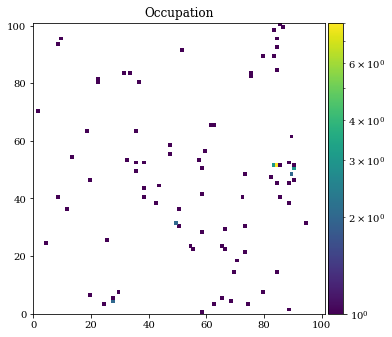

In [32]:
# one hundred galaxies
plot_recreate_som(kwst, hundred_win_map, som.shape, plot_occ_map = True)

In [33]:
# one thousand galaxies (not yet run)
#plot_recreate_som(kwst, thousand_win_map, som.shape, plot_occ_map = True)

# Are galaxies assigned to the same winning cell?

In [34]:
# open data file with SOM cell assignment
path = '/Users/diana/Research/DESI-SOM/data/KiDS'

# import data
KiDS1000_win_table = Table.read(f'{path}/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat_SOMcell.fits')

In [35]:
# order unique elements of array and return the number of times that each element 
# appears in the array
unique = np.unique(KiDS1000_win_table['Cell_SOM'][0:n_sample], return_counts = True)
print(unique)

# if things are working alright, should see that the number of counts per cell should 
# match the plot above. Currently, we have several cells that are over-populated. 

(<Column name='Cell_SOM' dtype='int32' length=94>
  58
 150
 174
 258
 716
 963
1059
 ...
9310
9486
9821
9923
9934
9952, array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1]))


In [36]:
# I'll do this as a loop (sorry Johannes) 
# generate an empty true map of winners
true_win_map = defaultdict(list)

for k in hundred_win_map.keys(): 
    true_win_map[k] = [] 

In [37]:
type(true_win_map)

collections.defaultdict

In [38]:
# step-by-step checking of error
# print 2D index of winning cell for particular galaxy
#print(unravel_index(KiDS1000_win_table[0]['Cell_SOM'], som.shape))

# print 1D index of winning cell for particular galaxy
#print(KiDS1000_win_table[0]['Cell_SOM'])

# append a "0" to the list stored in my dictionary of true winners at that particular 2D index
#true_win_map[unravel_index(KiDS1000_win_table['Cell_SOM'][0], som.shape)].append(0)
#true_win_map[unravel_index(KiDS1000_win_table['Cell_SOM'][1], som.shape)].append(1)
# although I've specified to only append the index of the winning galaxy to the specific key, 
# this instead appends every index of all galaxies to every single key
# This might also be related to the over population of certain cells error?

#print(true_win_map[unravel_index(KiDS1000_win_table[0]['Cell_SOM'], som.shape)])
#print(true_win_map[unravel_index(KiDS1000_win_table[1]['Cell_SOM'], som.shape)])

#FIXED!

In [39]:
for i in range(len(KiDS1000_win_table[0:n_sample])): 
    #indices = unravel_index(KiDS1000_win_table[i]['Cell_SOM'], som.shape)
    true_win_map[unravel_index(KiDS1000_win_table[i]['Cell_SOM'], som.shape)].append(i)
    
#print(true_win_map)

In [40]:
# check if two maps are equal
print("Does the generated winners map match the KiDS1000 winning map?", hundred_win_map == true_win_map)

Does the generated winners map match the KiDS1000 winning map? False


generating occupation map...


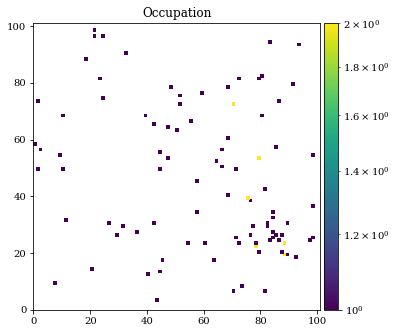

In [41]:
# KiDS-1000 win map of one hundred galaxies
plot_recreate_som(kwst, true_win_map, som.shape, plot_occ_map = True)

In [42]:
print(true_win_map[(0,58)])
print(hundred_win_map[(0,58)])

[71]
[]
